# Load Data

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
%matplotlib inline
from sklearn.metrics import accuracy_score, cohen_kappa_score

# Import data

In [194]:
df=pd.read_csv('Dataset 1.csv')
df=pd.read_csv('Dataset 1.csv')


In [195]:
df.head()

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,zip,country,latitude,longitude,created_at,updated_at,location,hour_of_day,day_of_week,parent_incident_type
0,100068327,12-02555,02/10/2012 10:46:00 AM,[CTPD]-THEFT - $50 TO $200 - AUTO ACCESS,THEFT - $50 TO $200 - AUTO ACCESS,NaN,600 Block TOOKANY CREEK PKWY,NaN,CHELTENHAM,PA,19012.0,NaN,40.068875,-75.121003,02/21/2012 03:15:04 PM,02/21/2012 03:15:06 PM,POINT (-75.121003 40.068875),10,Friday,Theft from Vehicle
1,100068328,12-02654,02/11/2012 10:14:00 PM,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,NaN,200 Block BICKLEY RD,NaN,WYNCOTE,PA,19038.0,NaN,40.097921,-75.154642,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.154642 40.097921),22,Saturday,Traffic
2,100068329,12-02598,02/10/2012 05:51:00 PM,[CTPD]-THEFT - $200 AND OVER - RETAIL,THEFT - $200 AND OVER - RETAIL,NaN,2400 Block SHOPPERS LN,NaN,WYNCOTE,PA,19095.0,NaN,40.076851,-75.154990,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.15499 40.076851),17,Friday,Theft
3,100068331,12-02535,02/09/2012 10:18:00 PM,[CTPD]-BURGLARY - FORCE - RESIDENCE - UNK,BURGLARY - FORCE - RESIDENCE - UNK,NaN,600 Block MEETINGHOUSE RD,NaN,ELKINS PARK,PA,NaN,NaN,40.085155,-75.124921,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.124921 40.085155),22,Thursday,Breaking & Entering
4,100068332,12-02556,02/10/2012 11:19:00 AM,[CTPD]-FRAUD - IDENTITY THEFT,FRAUD - IDENTITY THEFT,NaN,1 Block LIMEKILN TPK,NaN,GLENSIDE,PA,19038.0,NaN,40.106723,-75.163022,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.163022 40.106723),11,Friday,Theft


In [196]:
df.isnull().sum()

incident_id                  0
case_number                  0
incident_datetime            0
incident_type_primary        0
incident_description         0
clearance_type           26864
address_1                  220
address_2                26864
city                       101
state                      104
zip                       4536
country                  26864
latitude                   117
longitude                  117
created_at                 184
updated_at                   4
location                   264
hour_of_day                  0
day_of_week                  0
parent_incident_type         0
dtype: int64

In [197]:
for col in df:
    print (type(df[col][1]))

<class 'numpy.int64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'str'>


In [198]:
#data = df.drop(['clearance_type', 'address_2', 'country'], axis=1)

In [199]:
df.head()

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,zip,country,latitude,longitude,created_at,updated_at,location,hour_of_day,day_of_week,parent_incident_type
0,100068327,12-02555,02/10/2012 10:46:00 AM,[CTPD]-THEFT - $50 TO $200 - AUTO ACCESS,THEFT - $50 TO $200 - AUTO ACCESS,NaN,600 Block TOOKANY CREEK PKWY,NaN,CHELTENHAM,PA,19012.0,NaN,40.068875,-75.121003,02/21/2012 03:15:04 PM,02/21/2012 03:15:06 PM,POINT (-75.121003 40.068875),10,Friday,Theft from Vehicle
1,100068328,12-02654,02/11/2012 10:14:00 PM,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,NaN,200 Block BICKLEY RD,NaN,WYNCOTE,PA,19038.0,NaN,40.097921,-75.154642,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.154642 40.097921),22,Saturday,Traffic
2,100068329,12-02598,02/10/2012 05:51:00 PM,[CTPD]-THEFT - $200 AND OVER - RETAIL,THEFT - $200 AND OVER - RETAIL,NaN,2400 Block SHOPPERS LN,NaN,WYNCOTE,PA,19095.0,NaN,40.076851,-75.154990,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.15499 40.076851),17,Friday,Theft
3,100068331,12-02535,02/09/2012 10:18:00 PM,[CTPD]-BURGLARY - FORCE - RESIDENCE - UNK,BURGLARY - FORCE - RESIDENCE - UNK,NaN,600 Block MEETINGHOUSE RD,NaN,ELKINS PARK,PA,NaN,NaN,40.085155,-75.124921,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.124921 40.085155),22,Thursday,Breaking & Entering
4,100068332,12-02556,02/10/2012 11:19:00 AM,[CTPD]-FRAUD - IDENTITY THEFT,FRAUD - IDENTITY THEFT,NaN,1 Block LIMEKILN TPK,NaN,GLENSIDE,PA,19038.0,NaN,40.106723,-75.163022,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.163022 40.106723),11,Friday,Theft


In [200]:
new_df= df.fillna(0)
new_df=new_df.head(1000)
new_df

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,zip,country,latitude,longitude,created_at,updated_at,location,hour_of_day,day_of_week,parent_incident_type
0,100068327,12-02555,02/10/2012 10:46:00 AM,[CTPD]-THEFT - $50 TO $200 - AUTO ACCESS,THEFT - $50 TO $200 - AUTO ACCESS,0.0,600 Block TOOKANY CREEK PKWY,0.0,CHELTENHAM,PA,19012.0,0.0,40.068875,-75.121003,02/21/2012 03:15:04 PM,02/21/2012 03:15:06 PM,POINT (-75.121003 40.068875),10,Friday,Theft from Vehicle
1,100068328,12-02654,02/11/2012 10:14:00 PM,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,0.0,200 Block BICKLEY RD,0.0,WYNCOTE,PA,19038.0,0.0,40.097921,-75.154642,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.154642 40.097921),22,Saturday,Traffic
2,100068329,12-02598,02/10/2012 05:51:00 PM,[CTPD]-THEFT - $200 AND OVER - RETAIL,THEFT - $200 AND OVER - RETAIL,0.0,2400 Block SHOPPERS LN,0.0,WYNCOTE,PA,19095.0,0.0,40.076851,-75.154990,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.15499 40.076851),17,Friday,Theft
3,100068331,12-02535,02/09/2012 10:18:00 PM,[CTPD]-BURGLARY - FORCE - RESIDENCE - UNK,BURGLARY - FORCE - RESIDENCE - UNK,0.0,600 Block MEETINGHOUSE RD,0.0,ELKINS PARK,PA,0.0,0.0,40.085155,-75.124921,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.124921 40.085155),22,Thursday,Breaking & Entering
4,100068332,12-02556,02/10/2012 11:19:00 AM,[CTPD]-FRAUD - IDENTITY THEFT,FRAUD - IDENTITY THEFT,0.0,1 Block LIMEKILN TPK,0.0,GLENSIDE,PA,19038.0,0.0,40.106723,-75.163022,02/21/2012 03:15:04 PM,02/21/2012 03:15:07 PM,POINT (-75.163022 40.106723),11,Friday,Theft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,118451370,12-12584,07/04/2012 10:41:00 PM,[CTPD]-ROBBERY - STRONG ARM - HIGHWAY,ROBBERY - STRONG ARM - HIGHWAY,0.0,1500 Block WILLOW AVE,0.0,ELKINS PARK,PA,0.0,0.0,40.065449,-75.139582,07/10/2012 09:15:04 PM,07/10/2012 09:15:10 PM,POINT (-75.139582 40.065449),22,Wednesday,Robbery
996,118451372,12-12859,07/08/2012 02:45:00 PM,[CTPD]-FRAUD - CREDIT CARD OR ATM,FRAUD - CREDIT CARD OR ATM,0.0,8400 Block LIMEKILN TPK,0.0,WYNCOTE,PA,19095.0,0.0,40.079519,-75.162493,07/10/2012 09:15:04 PM,07/10/2012 09:15:11 PM,POINT (-75.162493 40.079519),14,Sunday,Theft
997,118451373,12-12501,07/03/2012 05:22:00 PM,[CTPD]-VANDALISM/CRIM MISCHIEF - VEHICLES,VANDALISM/CRIM MISCHIEF - VEHICLES,0.0,200 Block BARCLAY CIR,0.0,ELKINS PARK,PA,0.0,0.0,40.059518,-75.115442,07/10/2012 09:15:04 PM,07/10/2012 09:15:11 PM,POINT (-75.115442 40.059518),17,Tuesday,Property Crime
998,118451375,12-12861,07/08/2012 02:57:00 PM,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,0.0,1000 Block S EASTON RD,0.0,WYNCOTE,PA,19095.0,0.0,40.081864,-75.168736,07/10/2012 09:15:04 PM,07/10/2012 09:15:12 PM,POINT (-75.168736 40.081864),14,Sunday,Traffic


In [201]:
#new_df=df.interpolate
#new_df()

# Drop null values

In [202]:
new_df=df.dropna(axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26864 entries, 0 to 26863
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   incident_id            26864 non-null  int64 
 1   case_number            26864 non-null  object
 2   incident_datetime      26864 non-null  object
 3   incident_type_primary  26864 non-null  object
 4   incident_description   26864 non-null  object
 5   hour_of_day            26864 non-null  int64 
 6   day_of_week            26864 non-null  object
 7   parent_incident_type   26864 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.6+ MB


In [203]:
new_df.head(10)

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,hour_of_day,day_of_week,parent_incident_type
0,100068327,12-02555,02/10/2012 10:46:00 AM,[CTPD]-THEFT - $50 TO $200 - AUTO ACCESS,THEFT - $50 TO $200 - AUTO ACCESS,10,Friday,Theft from Vehicle
1,100068328,12-02654,02/11/2012 10:14:00 PM,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,22,Saturday,Traffic
2,100068329,12-02598,02/10/2012 05:51:00 PM,[CTPD]-THEFT - $200 AND OVER - RETAIL,THEFT - $200 AND OVER - RETAIL,17,Friday,Theft
3,100068331,12-02535,02/09/2012 10:18:00 PM,[CTPD]-BURGLARY - FORCE - RESIDENCE - UNK,BURGLARY - FORCE - RESIDENCE - UNK,22,Thursday,Breaking & Entering
4,100068332,12-02556,02/10/2012 11:19:00 AM,[CTPD]-FRAUD - IDENTITY THEFT,FRAUD - IDENTITY THEFT,11,Friday,Theft
5,100068334,12-02478,02/08/2012 06:16:00 PM,[CTPD]-THEFT - $50 TO $200 - BICYCLES,THEFT - $50 TO $200 - BICYCLES,18,Wednesday,Theft
6,100068335,12-02734,02/13/2012 08:47:00 AM,[CTPD]-VANDALISM/CRIM MISCHIEF - VEHICLES,VANDALISM/CRIM MISCHIEF - VEHICLES,8,Monday,Property Crime
7,100068336,12-02614,02/10/2012 10:35:00 PM,[CTPD]-DISORDERLY CONDUCT,DISORDERLY CONDUCT,22,Friday,Disorder
8,100068337,12-02656,02/11/2012 10:36:00 PM,[CTPD]-VANDALISM/CRIM MISCHIEF - VEHICLES,VANDALISM/CRIM MISCHIEF - VEHICLES,22,Saturday,Property Crime
9,100068338,12-02460,02/08/2012 01:40:00 PM,[CTPD]-DISORDERLY CONDUCT,DISORDERLY CONDUCT,13,Wednesday,Disorder


In [204]:
new_df.dtypes

incident_id               int64
case_number              object
incident_datetime        object
incident_type_primary    object
incident_description     object
hour_of_day               int64
day_of_week              object
parent_incident_type     object
dtype: object

# Convert sting values to float

In [205]:
df['case_number']= pd.to_numeric(df['case_number'], errors='coerce')
df['incident_datetime']= pd.to_numeric(df['incident_datetime'], errors='coerce')
df['incident_type_primary']= pd.to_numeric(df['incident_type_primary'], errors='coerce')
df['incident_description']= pd.to_numeric(df['incident_description'], errors='coerce')
df['created_at']= pd.to_numeric(df['created_at'], errors='coerce')
df['updated_at']= pd.to_numeric(df['updated_at'], errors='coerce')
df['address_1']= pd.to_numeric(df['address_1'], errors='coerce')
df['city']= pd.to_numeric(df['city'], errors='coerce')
df['state']= pd.to_numeric(df['state'], errors='coerce')
df['longitude']= pd.to_numeric(df['longitude'], errors='coerce')
df['location']= pd.to_numeric(df['location'], errors='coerce')
df['day_of_week']= pd.to_numeric(df['day_of_week'], errors='coerce')

In [206]:
new_df.dtypes

incident_id               int64
case_number              object
incident_datetime        object
incident_type_primary    object
incident_description     object
hour_of_day               int64
day_of_week              object
parent_incident_type     object
dtype: object

In [207]:
new_df.head(10)

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,hour_of_day,day_of_week,parent_incident_type
0,100068327,12-02555,02/10/2012 10:46:00 AM,[CTPD]-THEFT - $50 TO $200 - AUTO ACCESS,THEFT - $50 TO $200 - AUTO ACCESS,10,Friday,Theft from Vehicle
1,100068328,12-02654,02/11/2012 10:14:00 PM,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,22,Saturday,Traffic
2,100068329,12-02598,02/10/2012 05:51:00 PM,[CTPD]-THEFT - $200 AND OVER - RETAIL,THEFT - $200 AND OVER - RETAIL,17,Friday,Theft
3,100068331,12-02535,02/09/2012 10:18:00 PM,[CTPD]-BURGLARY - FORCE - RESIDENCE - UNK,BURGLARY - FORCE - RESIDENCE - UNK,22,Thursday,Breaking & Entering
4,100068332,12-02556,02/10/2012 11:19:00 AM,[CTPD]-FRAUD - IDENTITY THEFT,FRAUD - IDENTITY THEFT,11,Friday,Theft
5,100068334,12-02478,02/08/2012 06:16:00 PM,[CTPD]-THEFT - $50 TO $200 - BICYCLES,THEFT - $50 TO $200 - BICYCLES,18,Wednesday,Theft
6,100068335,12-02734,02/13/2012 08:47:00 AM,[CTPD]-VANDALISM/CRIM MISCHIEF - VEHICLES,VANDALISM/CRIM MISCHIEF - VEHICLES,8,Monday,Property Crime
7,100068336,12-02614,02/10/2012 10:35:00 PM,[CTPD]-DISORDERLY CONDUCT,DISORDERLY CONDUCT,22,Friday,Disorder
8,100068337,12-02656,02/11/2012 10:36:00 PM,[CTPD]-VANDALISM/CRIM MISCHIEF - VEHICLES,VANDALISM/CRIM MISCHIEF - VEHICLES,22,Saturday,Property Crime
9,100068338,12-02460,02/08/2012 01:40:00 PM,[CTPD]-DISORDERLY CONDUCT,DISORDERLY CONDUCT,13,Wednesday,Disorder


# Label Encoder

In [208]:

new_df['parent_incident_type'].unique()

array(['Theft from Vehicle', 'Traffic', 'Theft', 'Breaking & Entering',
       'Property Crime', 'Disorder', 'Liquor', 'Community Policing',
       'Assault', 'Weapons Offense', 'Missing Person', 'Drugs',
       'Theft of Vehicle', 'Robbery', 'Assault with Deadly Weapon',
       'Sexual Assault', 'Other', 'Kidnapping', 'Arson',
       'Other Sexual Offense', 'Family Offense', 'Homicide'], dtype=object)

In [209]:
#new_df=new_df.head(1000)
new_df

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,hour_of_day,day_of_week,parent_incident_type
0,100068327,12-02555,02/10/2012 10:46:00 AM,[CTPD]-THEFT - $50 TO $200 - AUTO ACCESS,THEFT - $50 TO $200 - AUTO ACCESS,10,Friday,Theft from Vehicle
1,100068328,12-02654,02/11/2012 10:14:00 PM,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,22,Saturday,Traffic
2,100068329,12-02598,02/10/2012 05:51:00 PM,[CTPD]-THEFT - $200 AND OVER - RETAIL,THEFT - $200 AND OVER - RETAIL,17,Friday,Theft
3,100068331,12-02535,02/09/2012 10:18:00 PM,[CTPD]-BURGLARY - FORCE - RESIDENCE - UNK,BURGLARY - FORCE - RESIDENCE - UNK,22,Thursday,Breaking & Entering
4,100068332,12-02556,02/10/2012 11:19:00 AM,[CTPD]-FRAUD - IDENTITY THEFT,FRAUD - IDENTITY THEFT,11,Friday,Theft
...,...,...,...,...,...,...,...,...
26859,831119768,17-27099,12/13/2017 07:07:00 PM,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,19,Wednesday,Traffic
26860,831119690,17-27100,12/13/2017 07:34:00 PM,[CTPD]-VEHICLE THEFT - AUTO,VEHICLE THEFT - AUTO,19,Wednesday,Theft of Vehicle
26861,831119767,17-27102,12/13/2017 08:10:00 PM,[CTPD]-THEFT - $200 AND OVER - RETAIL,THEFT - $200 AND OVER - RETAIL,20,Wednesday,Theft
26862,831119961,18-00404,01/09/2018 10:08:00 PM,[CTPD]-ACCIDENT - NON REPORTABLE,ACCIDENT - NON REPORTABLE,22,Tuesday,Traffic


In [210]:
lbl_encode=LabelEncoder()
new_df['day_of_week']=lbl_encode.fit_transform(new_df['day_of_week'])
new_df['parent_incident_type']=lbl_encode.fit_transform(new_df['parent_incident_type'])
new_df['incident_description']=lbl_encode.fit_transform(new_df['incident_description'])
new_df['incident_type_primary']=lbl_encode.fit_transform(new_df['incident_type_primary'])
new_df['incident_datetime']=lbl_encode.fit_transform(new_df['incident_datetime'])
new_df['case_number']=lbl_encode.fit_transform(new_df['case_number'])


C:\Users\malak\AppData\Local\Temp/ipykernel_23616/3963704421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['day_of_week']=lbl_encode.fit_transform(new_df['day_of_week'])
C:\Users\malak\AppData\Local\Temp/ipykernel_23616/3963704421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['parent_incident_type']=lbl_encode.fit_transform(new_df['parent_incident_type'])
C:\Users\malak\AppData\Local\Temp/ipykernel_23616/3963704421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [211]:
new_df1=new_df.head(1000)
new_df1

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,hour_of_day,day_of_week,parent_incident_type
0,100068327,4564,3158,112,112,10,0,18
1,100068328,4586,3245,1,1,22,2,20
2,100068329,4574,3153,109,109,17,0,17
3,100068331,4562,3099,31,31,22,4,3
4,100068332,4565,3159,64,64,11,0,17
...,...,...,...,...,...,...,...,...
995,118451370,5939,13493,92,92,22,6,15
996,118451372,5987,13767,62,62,14,3,17
997,118451373,5927,13420,129,129,17,5,14
998,118451375,5989,13768,1,1,14,3,20


In [212]:
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(new_df['day_of_week'])

array([0, 2, 0, ..., 6, 5, 6], dtype=int64)

In [213]:
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(new_df['parent_incident_type'])

array([18, 20, 17, ..., 17, 20, 14], dtype=int64)

In [214]:
lbl_encode=LabelEncoder()
lbl_encode.fit_transform(new_df['incident_description'])

array([112,   1, 109, ..., 109,   1, 129], dtype=int64)

In [215]:
new_df.head(10)

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,hour_of_day,day_of_week,parent_incident_type
0,100068327,4564,3158,112,112,10,0,18
1,100068328,4586,3245,1,1,22,2,20
2,100068329,4574,3153,109,109,17,0,17
3,100068331,4562,3099,31,31,22,4,3
4,100068332,4565,3159,64,64,11,0,17
5,100068334,4554,3021,113,113,18,6,17
6,100068335,4602,3396,129,129,8,1,14
7,100068336,4576,3157,43,43,22,0,5
8,100068337,4588,3246,129,129,22,2,14
9,100068338,4551,3018,43,43,13,6,5


In [216]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

# Train and Split

In [217]:
x=new_df.drop("parent_incident_type",axis=1)
y=new_df["parent_incident_type"]

In [218]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(len(y_train))
print(len(y_test))


18804
8060


# Creating & Training Decision Tree Model

In [219]:
from sklearn import tree
dt_clf=tree.DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train, y_train)
dt_clf.score(x_test, y_test)




0.8708436724565757

In [220]:
y_pred1= dt_clf.predict(x_test)
dt_clf.score(x_test, y_test)

0.8708436724565757

In [221]:
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

In [222]:
#from sklearn import metrics
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [249]:
#from sklearn.model_selection import cross_val_predict
#y_train_pred = cross_val_predict(dt_clf, x_train, y_train, cv=10)


In [250]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(y_train, y_train_pred)

In [225]:
#Accuracy= accuracy_score(y_test, y_pred) 
#Kappa= cohen_kappa_score(y_test, y_pred)
#Accuracy, Kappa

In [226]:
#y_pred= dt_clf.predict(x_test)
#from sklearn.metrics import confusion_matrix
#mat=confusion_matrix(y_test, y_pred)
#mat

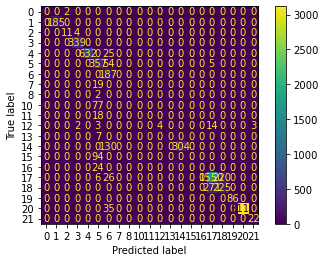

In [248]:
plot_confusion_matrix(dt_clf, x_test, y_test)
plt.show()

In [227]:
print('Decision Tree Classifier' + '\n')
print(classification_report(y_test,y_pred1))

print('\n')

print('Confusion matrix')

Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00       185
           2       0.85      0.73      0.79        15
           3       0.98      1.00      0.99       339
           4       1.00      0.96      0.98       657
           5       0.59      0.86      0.70       416
           6       0.41      1.00      0.58       187
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        77
          11       0.00      0.00      0.00        18
          12       1.00      0.15      0.27        26
          13       0.00      0.00      0.00         7
          14       1.00      0.70      0.82       434
          15       0.00      0.00      0.00        94
          16       0.00      0.00      0.00        24
          17       0.84      0.86      0.85      1802
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [228]:
accuracy_score(y_test, y_pred1)

0.8708436724565757

In [229]:
#from sklearn.model_selection import cross_val_predict
#pred= cross_val_predict(dt_clf, x_test, y_test)
#pred

In [230]:
#scores_test = cross_val_score(dt_clf, x_train, y_train, scoring='r2', cv=10)
#scores_test

In [231]:
#print(np.mean(scores_test))

# Random Forest Classifier

In [244]:
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
rf_clf= ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_train, y_train)
y_pred= rf_clf.predict(x_test)
rf_clf.score(x_test, y_test)

0.9915632754342432

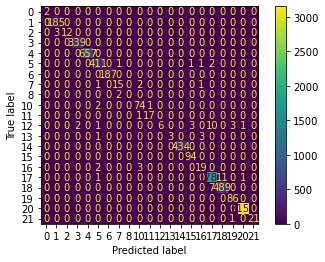

In [247]:

plot_confusion_matrix(rf_clf, x_test, y_test)
plt.show()
#plt.savefig('plotimagerf1.png', bbox_inches="tight")

In [52]:
print('Random Forest Classifier' + '\n')
print(classification_report(y_test,y_pred))

print('\n')

print('Confusion matrix')

Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99       185
           2       1.00      0.80      0.89        15
           3       1.00      1.00      1.00       339
           4       1.00      1.00      1.00       657
           5       0.99      0.98      0.98       416
           6       1.00      1.00      1.00       187
           7       0.79      0.79      0.79        19
           8       0.00      0.00      0.00         2
          10       0.94      0.99      0.96        77
          11       1.00      0.89      0.94        18
          12       1.00      0.31      0.47        26
          13       1.00      0.43      0.60         7
          14       1.00      1.00      1.00       434
          15       0.96      1.00      0.98        94
          16       0.83      0.83      0.83        24
          17       0.99      0.99      0.99      1802
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes Classifier

In [53]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(x_train, y_train)
nb_clf.score(x_train, y_train)
y_pred3= nb_clf.predict(x_test)
nb_clf.score(x_test, y_test)

0.3910669975186104

In [54]:
print('Naive Bayes Classifier' + '\n')
print(classification_report(y_test,y_pred3))

print('\n')

print('Confusion matrix')

Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00       185
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00       339
           4       0.00      0.00      0.00       657
           5       0.00      0.00      0.00       416
           6       0.00      0.00      0.00       187
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        77
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00       434
          15       0.00      0.00      0.00        94
          16       0.00      0.00      0.00        24
          17       0.00      0.00      0.00      1802
   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


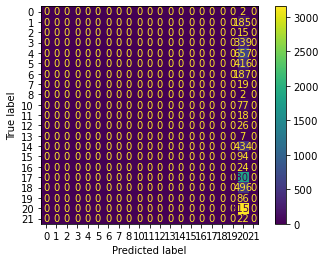

In [76]:

plot_confusion_matrix(nb_clf, x_test, y_test)
plt.show()
#plt.savefig('plotimagerf1.png', bbox_inches="tight")

# K-NearestNeighbour Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)
knn_clf.score(x_train, y_train)
y_pred4= knn_clf.predict(x_test)
knn_clf.score(x_test, y_test)

0.5558312655086849

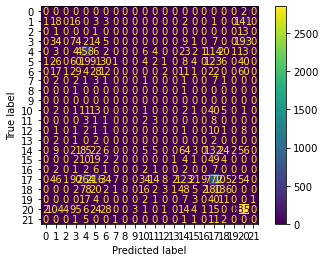

In [251]:
plot_confusion_matrix(knn_clf, x_test, y_test)
plt.show()

In [56]:
print('K-Nearest Neighbour Classifier' + '\n')
print(classification_report(y_test,y_pred4))

print('\n')

print('Confusion matrix')

K-Nearest Neighbour Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.07      0.10      0.08       185
           2       0.00      0.00      0.00        15
           3       0.18      0.22      0.20       339
           4       0.47      0.70      0.56       657
           5       0.19      0.22      0.20       416
           6       0.09      0.06      0.08       187
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0
          10       0.01      0.01      0.01        77
          11       0.09      0.17      0.12        18
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00         7
          14       0.20      0.15      0.17       434
          15       0.02      0.01      0.01        94
          16       0.00      0.00      0.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

# Logistic Regression Classifier

In [59]:
from sklearn.linear_model import LogisticRegression
lr_clf= LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_train, y_train)
y_pred5= lr_clf.predict(x_test)
lr_clf.score(x_test, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3910669975186104

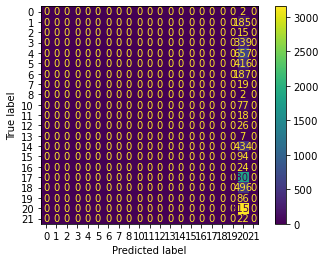

In [252]:
plot_confusion_matrix(lr_clf, x_test, y_test)
plt.show()

In [60]:
print('Logistic Regression Classifier' + '\n')
print(classification_report(y_test,y_pred5))

print('\n')

print('Confusion matrix')

Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00       185
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00       339
           4       0.00      0.00      0.00       657
           5       0.00      0.00      0.00       416
           6       0.00      0.00      0.00       187
           7       0.00      0.00      0.00        19
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00        77
          11       0.00      0.00      0.00        18
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00         7
          14       0.00      0.00      0.00       434
          15       0.00      0.00      0.00        94
          16       0.00      0.00      0.00        24
          17       0.00      0.00      0.00      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
